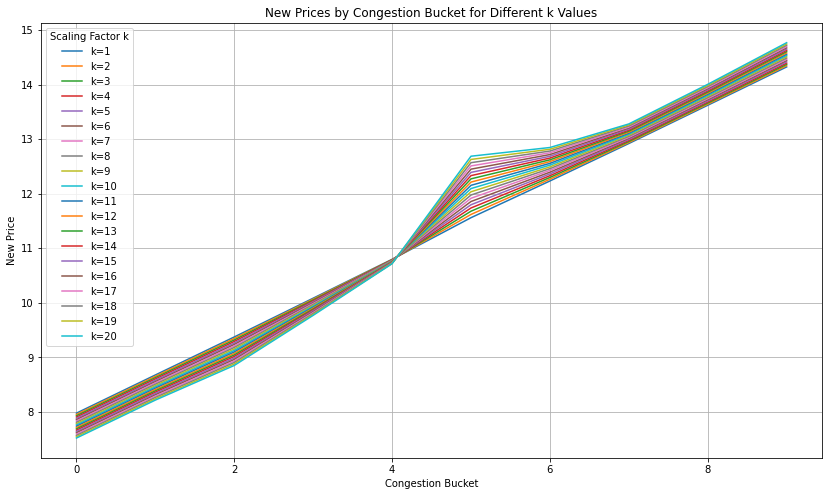

In [35]:
import matplotlib.pyplot as plt

current_proportions = [0.17607206, 0.07766146, 0.11497712, 0.10846289, 0.13212514, 0.20613367,
                       0.10652815, 0.02549855, 0.0368258, 0.01571516]
target_proportions = [0.2001, 0.0997, 0.1377, 0.1209, 0.1350, 0.1693, 0.0883, 0.0158, 0.0274, 0.0058]
current_price = 8

base_scale = 1.1 
base_price_increase = 0.7 

price_by_k = {}

for k in range(20, 61, 5):
    new_prices = [current_price + k * (base_scale ** i) * (current_p - target_p) + base_price_increase * i
                  for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions))]
    price_by_k[k] = new_prices

plt.figure(figsize=(14, 8))
for k, prices in price_by_k.items():
    plt.plot(range(10), prices, label=f'k={k}')

plt.title('New Prices by Congestion Bucket for Different k Values')
plt.xlabel('Congestion Bucket')
plt.ylabel('New Price')
plt.legend(title='Scaling Factor k')
plt.grid(True)
plt.show()

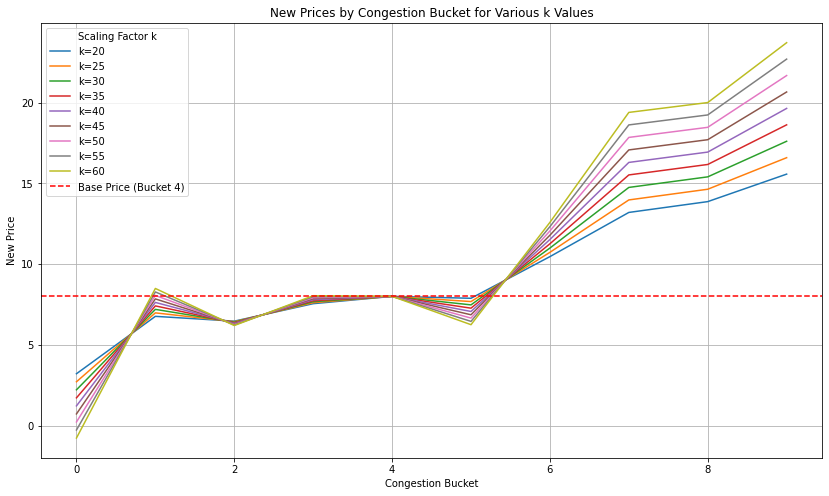

In [36]:
# Bucket 4 is base bucket
k_values = range(20, 61, 5)

prices_by_k = {}

for k in k_values:
    new_prices = []
    for i, (current_p, target_p) in enumerate(zip(current_proportions, target_proportions)):
        if i == 4:
            new_price = current_price
        else:
            # Differential pricing based on distance from bucket 4 and differences in proportions
            price_adjustment = k * (base_scale ** abs(i - 4)) * (current_proportions[4] - target_p)
            if i > 4:
                price_adjustment += 0.7 * (i - 4)  # Incrementally higher for buckets above 4
            else:
                price_adjustment -= 0.7 * (4 - i)  # Incrementally lower for buckets below 4
            new_price = current_price + price_adjustment
        new_prices.append(new_price)
    prices_by_k[k] = new_prices

plt.figure(figsize=(14, 8))
for k, prices in prices_by_k.items():
    plt.plot(range(10), prices, label=f'k={k}')

plt.title('New Prices by Congestion Bucket for Various k Values')
plt.xlabel('Congestion Bucket')
plt.ylabel('New Price')
plt.axhline(y=current_price, color='r', linestyle='--', label="Base Price (Bucket 4)")
plt.legend(title='Scaling Factor k')
plt.grid(True)
plt.show()